Saving nba_traditional_stats_2024_2025.csv to nba_traditional_stats_2024_2025.csv
Using file: nba_traditional_stats_2024_2025.csv
Filtered to 422 players for 2024-25 Regular Season
Sample of Box Score Disruption Index table:


,PLAYER,TEAM,GP,MIN,STL,BLK,STL_per36,BLK_per36,Disruption_Index
0,Victor Wembanyama,SAS,46,1527,52,176,1.225933,4.149312,5.375246
1,Paul Reed,DET,45,438,39,25,3.205479,2.054795,5.260274
2,Robert Williams III,POR,20,351,13,33,1.333333,3.384615,4.717949
3,Jonathan Isaac,ORL,71,1090,61,80,2.014679,2.642202,4.656881
4,Charles Bassey,SAS,36,376,14,30,1.340426,2.872340,4.212766
5,Mouhamed Gueye,ATL,33,533,28,33,1.891182,2.228893,4.120075
6,Alex Caruso,OKC,54,1041,87,30,3.008646,1.037464,4.046110
7,Dyson Daniels,ATL,76,2571,229,55,3.206534,0.770128,3.976663
8,Donovan Clingan,POR,67,1324,34,110,0.924471,2.990937,3.915408
9,Chet Holmgren,OKC,32,877,23,71,0.944128,2.914481,3.858609



Top 15 Box Score Disruptors (STL+BLK per 36):


,PLAYER,TEAM,GP,MIN,STL,BLK,STL_per36,BLK_per36,Disruption_Index
0,Victor Wembanyama,SAS,46,1527,52,176,1.225933,4.149312,5.375246
1,Paul Reed,DET,45,438,39,25,3.205479,2.054795,5.260274
2,Robert Williams III,POR,20,351,13,33,1.333333,3.384615,4.717949
3,Jonathan Isaac,ORL,71,1090,61,80,2.014679,2.642202,4.656881
4,Charles Bassey,SAS,36,376,14,30,1.340426,2.872340,4.212766
5,Mouhamed Gueye,ATL,33,533,28,33,1.891182,2.228893,4.120075
6,Alex Caruso,OKC,54,1041,87,30,3.008646,1.037464,4.046110
7,Dyson Daniels,ATL,76,2571,229,55,3.206534,0.770128,3.976663
8,Donovan Clingan,POR,67,1324,34,110,0.924471,2.990937,3.915408
9,Chet Holmgren,OKC,32,877,23,71,0.944128,2.914481,3.858609


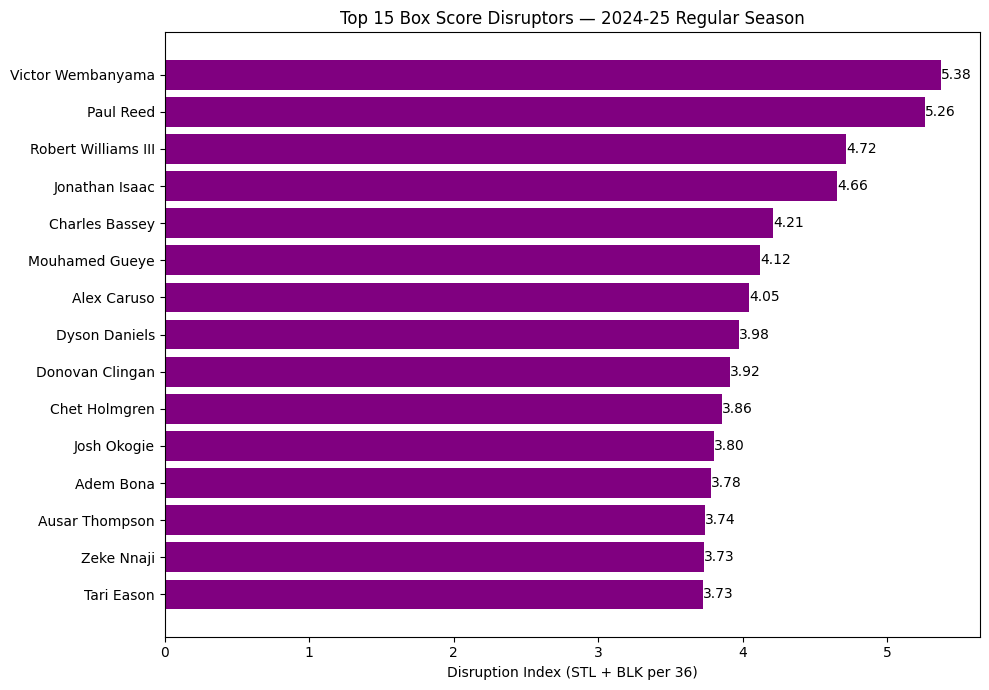


Saved:
- box_score_disruption_2024_25.csv (full table)
- leaders_box_score_disruption_2024_25.csv (top disruptors)
- box_score_disruptors.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# 🏀 Box Score Disruption Index — 2024-25 Regular Season
# ------------------------------------------------------------
# Dataset columns used:
# PLAYER, TEAM, Year, Season Type, GP, MIN, STL, BLK
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", None)

# ================================
# 1) Load CSV (Colab or Local)
# ================================
try:
    from google.colab import files
    uploaded = files.upload()
    file_path = list(uploaded.keys())[0]
except:
    file_path = "nba_traditional_stats_2024_2025.csv"   # <-- change if local

print("Using file:", file_path)
df = pd.read_csv(file_path)
df.columns = [c.strip() for c in df.columns]

# Clean Season Type
if "Season Type" in df.columns:
    df["Season Type"] = df["Season Type"].astype(str).str.replace("%20", " ", regex=False)

# Ensure numeric
num_cols = ["GP","MIN","STL","BLK"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# ================================
# 2) Filter to 2024-25 Regular Season
# ================================
df_use = df[(df["Year"] == "2024-25") &
            (df["Season Type"].str.lower() == "regular season")].copy()

MIN_GP = 20
MIN_MINUTES = 300
df_use = df_use[(df_use["GP"] >= MIN_GP) & (df_use["MIN"] >= MIN_MINUTES)].copy()

print(f"Filtered to {len(df_use)} players for 2024-25 Regular Season")

# ================================
# 3) Compute Box Score Disruption Index
# ================================
df_use["STL_per36"] = (df_use["STL"] / df_use["MIN"]) * 36
df_use["BLK_per36"] = (df_use["BLK"] / df_use["MIN"]) * 36

# Disruption Index = STL + BLK per 36
df_use["Disruption_Index"] = df_use["STL_per36"] + df_use["BLK_per36"]

cols_out = ["PLAYER","TEAM","GP","MIN","STL","BLK","STL_per36","BLK_per36","Disruption_Index"]
disrupt_tbl = (df_use[cols_out]
               .sort_values("Disruption_Index", ascending=False)
               .reset_index(drop=True))

print("Sample of Box Score Disruption Index table:")
display(disrupt_tbl.head(10))

# ================================
# 4) Leaderboards
# ================================
TOPN = 15
leaders = disrupt_tbl.head(TOPN)

print(f"\nTop {TOPN} Box Score Disruptors (STL+BLK per 36):")
display(leaders)

# ================================
# 5) Plots
# ================================
plt.figure(figsize=(10, 7))
plt.barh(leaders["PLAYER"][::-1], leaders["Disruption_Index"][::-1], color="purple")
for i, v in enumerate(leaders["Disruption_Index"][::-1]):
    plt.text(v, i, f"{v:.2f}", va="center", ha="left")
plt.xlabel("Disruption Index (STL + BLK per 36)")
plt.title(f"Top {TOPN} Box Score Disruptors — 2024-25 Regular Season")
plt.tight_layout()
plt.savefig("box_score_disruptors.png", dpi=300)
plt.show()

# ================================
# 6) Save Outputs
# ================================
disrupt_tbl.to_csv("box_score_disruption_2024_25.csv", index=False)
leaders.to_csv("leaders_box_score_disruption_2024_25.csv", index=False)

print("\nSaved:")
print("- box_score_disruption_2024_25.csv (full table)")
print("- leaders_box_score_disruption_2024_25.csv (top disruptors)")
print("- box_score_disruptors.png")

# ================================
# 7) Zip & Download (Colab)
# ================================
import os, zipfile
from google.colab import files

outputs = [
    "box_score_disruption_2024_25.csv",
    "leaders_box_score_disruption_2024_25.csv",
    "box_score_disruptors.png"
]

zip_name = "box_score_disruption_outputs_2024_25.zip"

with zipfile.ZipFile(zip_name, "w") as z:
    for f in outputs:
        if os.path.exists(f):
            z.write(f)

files.download(zip_name)